In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.ticker as ticker
import joblib

In [41]:
df_categorias = joblib.load('../../util/data/df_categorias.z')
df_vendas = joblib.load('../../util/data/df_vendas.z')
df_vendedores = joblib.load('../../util/data/df_vendedores.z')
df_unidades = joblib.load('../../util/data/df_unidades.z')
df_clientes = joblib.load('../../util/data/df_clientes.z')
df_produtos = joblib.load('../../util/data/df_produtos.z')

In [42]:
dataframes = {
    "categorias": df_categorias,
    "vendas": df_vendas,
    "vendedores": df_vendedores,
    "unidades": df_unidades,
    "clientes": df_clientes,
    "produtos": df_produtos
}

## 1. Tendência temporal de vendas

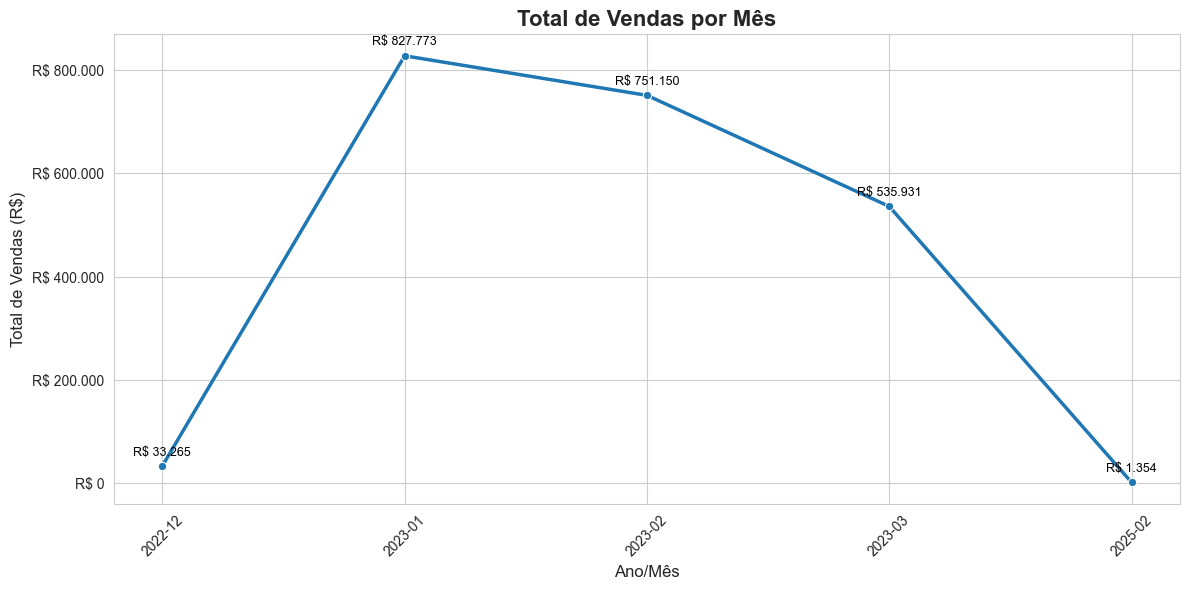

In [43]:
df_vendas['data_emissao'] = pd.to_datetime(df_vendas['data_emissao'])
df_vendas['ano_mes'] = df_vendas['data_emissao'].dt.to_period('M')

vendas_mensais = df_vendas.groupby('ano_mes')['total'].sum().reset_index()
vendas_mensais['ano_mes'] = vendas_mensais['ano_mes'].astype(str)
vendas_mensais = vendas_mensais.sort_values(by='ano_mes')

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.lineplot(data=vendas_mensais, x='ano_mes', y='total', marker='o', color='#1f77b4', linewidth=2.5)

plt.title('Total de Vendas por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Ano/Mês', fontsize=12)
plt.ylabel('Total de Vendas (R$)', fontsize=12)
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(",", ".")))

for i, row in vendas_mensais.iterrows():
    ax.text(row['ano_mes'], row['total'] + 20000, f"R$ {row['total']:,.0f}".replace(",", "."), 
            color='black', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


##### Análise da Tendência de Vendas

1. Pico em Janeiro de 2023 - O maior volume de vendas ocorreu em janeiro de 2023, com mais de R$ 800 mil em vendas.
Isso pode estar relacionado a:
- Alta sazonalidade de início de ano (ex: promoções de verão, metas de vendas, campanhas pós-festas).
- Ou algum evento específico nesse mês (lançamento de produto, campanhas agressivas, etc.).

2. Queda Progressiva Após o Pico - Após janeiro:
- Fevereiro e março mostram uma queda gradual, embora o valor ainda seja significativo.
- Em março de 2023, o total de vendas ainda está acima de R$ 500 mil.


##### Resumo:
O gráfico revela uma forte concentração de vendas no início de 2023, seguida de queda progressiva nos meses seguintes.
Esses dados podem servir de base para investigar:
- O que funcionou em janeiro de 2023.
- Se há sazonalidade que pode ser replicada.
- Como evitar quedas nos meses seguintes.

## 2. Sazonalidade por dia da semana

C:\Users\User\AppData\Local\Temp\ipykernel_8044\2598580271.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vendas_por_dia, x='dia_semana', y='total', palette=cores)


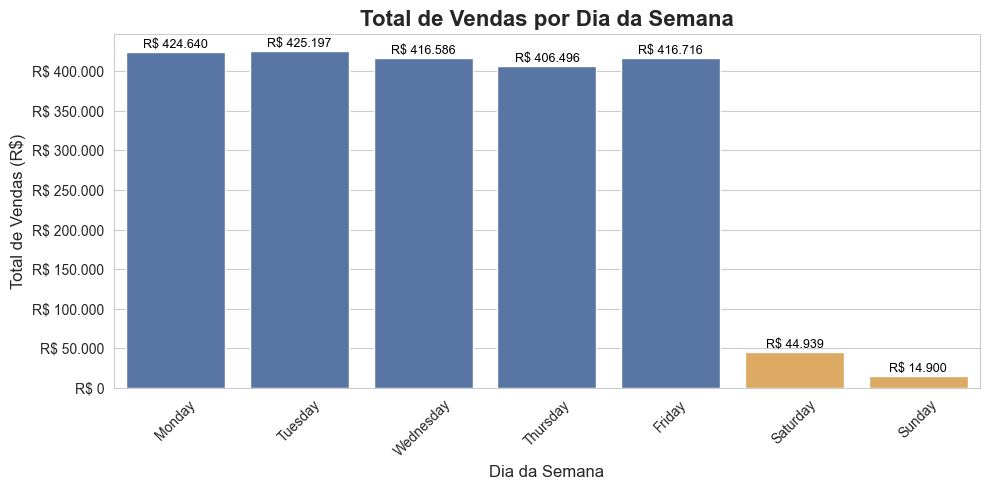

In [44]:
df_vendas['dia_semana'] = df_vendas['data_emissao'].dt.day_name()
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

vendas_por_dia = (
    df_vendas.groupby('dia_semana')['total']
    .sum()
    .reindex(dias_ordenados)
    .reset_index()
)

cores = ['#4c72b0' if dia not in ['Saturday', 'Sunday'] else '#f0ad4e' for dia in vendas_por_dia['dia_semana']]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=vendas_por_dia, x='dia_semana', y='total', palette=cores)

plt.title('Total de Vendas por Dia da Semana', fontsize=16, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Total de Vendas (R$)', fontsize=12)
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(",", ".")))

for index, row in vendas_por_dia.iterrows():
    ax.text(index, row['total'] + 5000, f"R$ {row['total']:,.0f}".replace(",", "."), 
            color='black', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


#### Total de Vendas por Dia da Semana
##### Padrões Observados
Segunda a sexta-feira:
- As vendas se mantêm altas e estáveis, acima de R$ 400.000 por dia.
- Pequena variação entre os dias úteis, mas sem grandes picos ou quedas.

Sábado e domingo:
- Há uma queda drástica nas vendas, especialmente no domingo, que apresenta o menor valor (menor que R$ 20.000).
- Sábado também é significativamente mais fraco que os dias úteis.

##### Insights:
Foco de vendas está nos dias úteis: Os dias de semana concentram praticamente toda a receita da empresa e o final de semana tem impacto quase nulo.

Pode ser que:
- O negócio não funcione ou opere parcialmente nos fins de semana.
- O público-alvo não consome nesses dias.
- A plataforma ou loja seja usada apenas em contexto corporativo.

## 3. Padrão entre desconto e total da venda

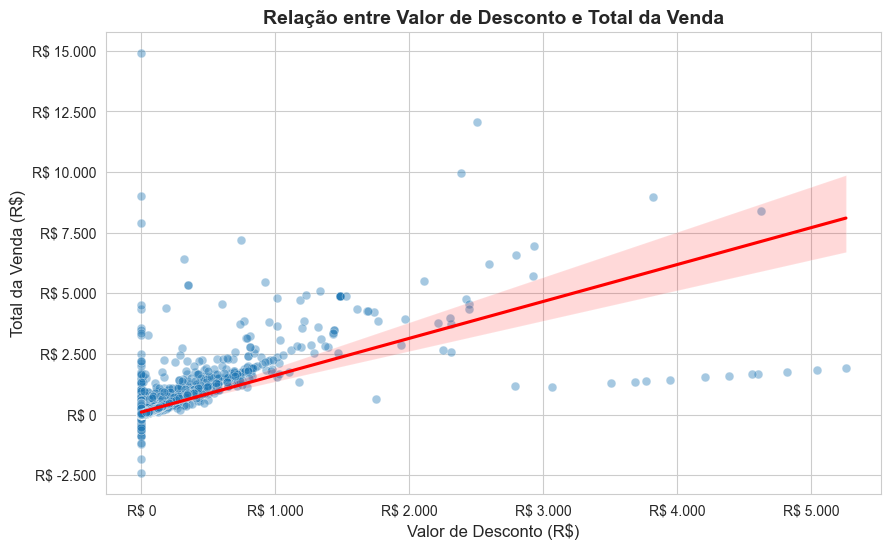

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(data=df_vendas, x='valor_desconto', y='total', alpha=0.4, s=40)

sns.regplot(data=df_vendas, x='valor_desconto', y='total', scatter=False, ax=ax, color='red', line_kws={'label': 'Tendência'})

plt.title('Relação entre Valor de Desconto e Total da Venda', fontsize=14, fontweight='bold')
plt.xlabel('Valor de Desconto (R$)', fontsize=12)
plt.ylabel('Total da Venda (R$)', fontsize=12)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(",", ".")))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'R$ {y:,.0f}'.replace(",", ".")))


### Análise do Gráfico de Dispersão
##### Concentração no Eixo Próximo de Zero (Desconto Baixo)
- A maioria das vendas está concentrada com descontos muito baixos (próximos de R$ 0).
- Isso indica que a empresa raramente oferece descontos altos, e mesmo com pouco desconto, o volume de vendas se mantém.

##### Relação Positiva Moderada
- Existe uma tendência ascendente até certo ponto: conforme o desconto aumenta, o valor total da venda também pode aumentar – até certo limite.
- Isso pode indicar que descontos moderados incentivam vendas maiores, possivelmente porque o cliente compra mais unidades ou produtos de maior valor.

##### Outliers e Exceções
- Há pontos com vendas muito altas e descontos muito altos, mas são raros.
- Também aparecem vendas com total negativo ou próximo de zero, o que pode indicar erros de lançamento, cancelamentos ou devoluções. Esses dados devem ser investigados mais a fundo.

##### Região de Saturação
- A partir de um certo valor de desconto (acima de R$ 2.000), o total da venda não aumenta significativamente, e a dispersão cresce.
- Isso pode indicar que dar descontos muito altos não garante vendas maiores — podendo até diminuir a margem de lucro sem aumento proporcional de receita.

### Insights:
- Descontos Pequenos São Eficientes: Descontos baixos já geram bom volume de vendas. Vale manter essa política controlada.
- Atenção a Descontos Muito Altos: Não há forte evidência de que descontos altos geram vendas proporcionais. Avaliar o custo-benefício.

## Outras informações

Verificando valores ausentes:

In [46]:
print(df_vendas.isnull().sum())

codigo_empresa           0
centro_resultado         0
documento                0
codigo_cliente           0
codigo_empregado         0
data_emissao             0
hora_emissao             0
data_fechamento          0
hora_fechamento          0
data_faturamento         0
codigo_produto           0
quantidade               0
quantidade_minmax        0
quantidade_zscore        0
total                    0
total_minmax             0
total_zscore             0
custo_medio              0
custo_medio_minmax       0
custo_medio_zscore       0
valor_desconto           0
valor_desconto_minmax    0
valor_desconto_zscore    0
pedido_DV                0
pedido_PV                0
ano_mes                  0
dia_semana               0
dtype: int64


Estatísticas descritivas gerais:

In [47]:
stats = df_vendas[['total', 'quantidade', 'valor_desconto']].describe().round(2)
print(tabulate(stats, headers='keys', tablefmt='fancy_grid'))

╒═══════╤══════════╤══════════════╤══════════════════╕
│       │    total │   quantidade │   valor_desconto │
╞═══════╪══════════╪══════════════╪══════════════════╡
│ count │ 10418    │     10418    │         10418    │
├───────┼──────────┼──────────────┼──────────────────┤
│ mean  │   206.32 │         5.46 │            67.75 │
├───────┼──────────┼──────────────┼──────────────────┤
│ std   │   513.62 │        19.76 │           226.18 │
├───────┼──────────┼──────────────┼──────────────────┤
│ min   │ -2415    │       -59    │             0    │
├───────┼──────────┼──────────────┼──────────────────┤
│ 25%   │    30    │         1    │             2.66 │
├───────┼──────────┼──────────────┼──────────────────┤
│ 50%   │    79.79 │         2    │            15.68 │
├───────┼──────────┼──────────────┼──────────────────┤
│ 75%   │   199.97 │         5    │            56.4  │
├───────┼──────────┼──────────────┼──────────────────┤
│ max   │ 14900    │       600    │          5262    │
╘═══════╧═